# Perceptron
---
title: Perceptron
author: Prateek Wadhavkar
---

Here is the link to the python file: https://github.com/pwad1/465_blog1/blob/main/perceptron.py

# Experiments

## Experiment 1

Using 2d data like the data in the example, if the data is linearly separable then the perceptron algorithm converges to weight vector w describing a separating line (provided that the maximum number of iterations is large enough).

Please show visualizations of the data, the separating line, and the evolution of the accuracy over training. It’s also fine for you to use the loss instead of the accuracy if you’d prefer.

(The two visualizations above show the data with the line of separation and the evolution of the accuracy over time)

As we can observe in the first chart, the data is linearly separable, and the line of separation, as produced by the Perceptron, separates the two colors.

The second chart indicates the accuracy for the perceptron, based on the proportion of points classified correctly, by the number of iterations.

[0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 1.0]


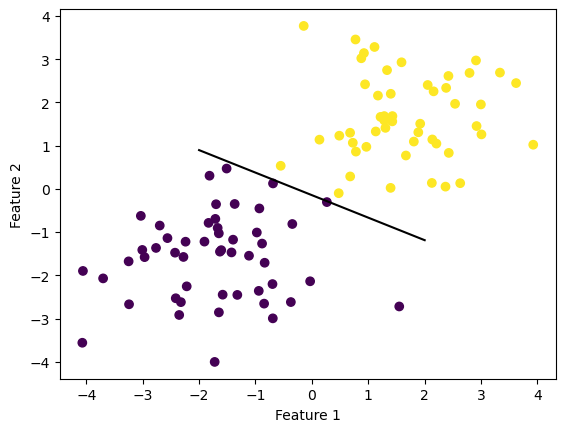

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

from perceptron import Perceptron

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

p = Perceptron()
p.fit(X, y, max_steps=1000)
p.w
print(p.history[-10:])

w= np.array([1, 2, 3, 4, 5])
x= np.array([2, 2, 3, 4, 5])
b= 1000


def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#print(Perceptron.perceptron_classify(w, b ,x))

#print(Perceptron.fit(w,x))

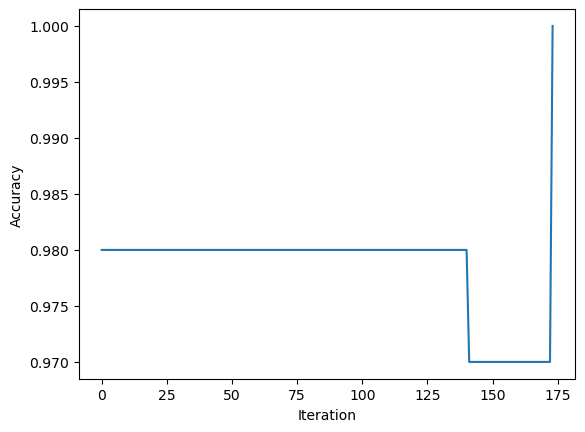

In [5]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

## Experiment 2

For 2d data, when the data is not linearly separable, the perceptron algorithm will not settle on a final value of w, but will instead run until the maximum number of iterations is reached, without achieving perfect accuracy.

Please show visualizations of the data, the line in the final iteration, and the evolution of the score over training.

[0.52, 0.54, 0.45, 0.48, 0.48, 0.41, 0.47, 0.48, 0.48, 0.48]


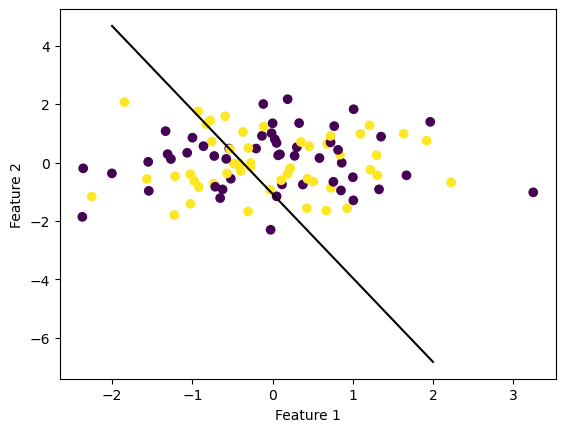

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

from perceptron import Perceptron

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers =  [(0, 0), (0, 0)])

p = Perceptron()
p.fit(X, y, max_steps=1000)
p.w
print(p.history[-10:])

w= np.array([1, 2, 3, 4, 5])
x= np.array([2, 2, 3, 4, 5])
b= 1000


def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

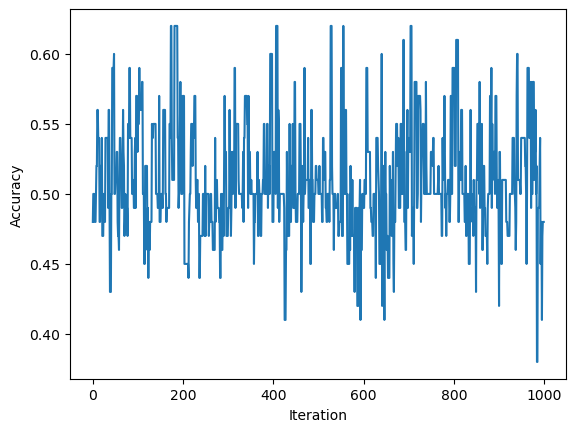

In [12]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

The perceptron algorithm is also able to work in more than 2 dimensions! Show an example of running your algorithm on data with at least 5 features. You don’t need to visualize the data or the separating line, but you should still show the evolution of the score over the training period. Include a comment on whether you believe that the data is linearly separable based on your observation of the score.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

from perceptron import Perceptron

np.random.seed(12345)

n = 100
p_features = 5

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(8, 8), (-8, -8), (0, 0), (4, 4)])

p = Perceptron()
p.fit(X, y, max_steps=50000)
p.w
print(p.history[-10:])

w= np.array([1, 2, 3, 4, 5])
x= np.array([2, 2, 3, 4, 5])
b= 1000

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


Here is the link to the python file: https://github.com/pwad1/465_blog1/blob/main/perceptron.py

# Writing  

- A brief walk-through of your implementation of the perceptron update (Equation 1) in your source code. Quote the function which you use to perform the update. It’s not necessary to walk the user through every single aspect of your solution class.

Generates w, an instance of weights. This is initially generated randomly. We then randomly choose a point in X, and check whether our perceptron classifies it correctly. If the perceptron classifies it correctly, we do not update w, and check whether the accuracy of the perceptron is 100%. If the accuracy is 100%- our job is done. If the accuracy is not 100%- we select another random point in X, and check if it is classified correctly. If it is classified incorrectly, we update the value of w by the function self.w+=y[i]*X[i]. We repeat this until the perceptron gives us a 100% accuracy, or we reach the max steps.
    
- At the end of your blog post, please address the following question: What is the runtime complexity of a single iteration of the perceptron algorithm update as described by Equation 1? Assume that the relevant operations are addition and multiplication. Does the runtime complexity depend on the number of data points n? What about the number of features p? You only need to consider this question in the context of a single update. The question of how many updates are required to converge is a trickier one that you don’t have to discuss in your blog post.

For a single iteration of our perceptron algorithm, the runtime complexity of our algirthm is linearly proportional to the number of data points n and the number of features p. Hence, the time complexity of this algorithm would be O(np). 

While the question does not ask for the worst case runtime complexity for the overall algorithm- I believe that it would be in exponential time for the number of data points n. I am not certain about how the number of features factors into this analysis.